<a href="https://colab.research.google.com/github/blackwithwhitegreen/Boosting-Algo/blob/main/applying_bagging_classifier_for_just_fun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-index-and-inflation-dataset/WHI_Inflation.csv


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/kaggle/input/world-happiness-index-and-inflation-dataset/WHI_Inflation.csv',delimiter="\t",encoding="ascii")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1203 non-null   object 
 1   Year                                    1203 non-null   int64  
 2   Rank                                    1203 non-null   int64  
 3   Score                                   1203 non-null   float64
 4   GDP per Capita                          1203 non-null   float64
 5   Social support                          1203 non-null   float64
 6   Healthy life expectancy at birth        1203 non-null   float64
 7   Freedom to make life choices            1203 non-null   float64
 8   Generosity                              1203 non-null   float64
 9   Perceptions of corruption               1202 non-null   float64
 10  Energy Consumer Price Inflation         1074 non-null   floa

In [ ]:
df['Producer Price Inflation'].sample(30)

238     -0.471420
321     -0.889474
854      1.423481
429           NaN
625     -1.174983
462     -0.052867
1069     0.698440
533     -9.931521
324      0.939709
608           NaN
155     29.169977
1161     9.672765
514     -5.636161
990      7.118041
469      3.310502
1056    11.829577
98      12.242252
464      4.266201
589           NaN
884     22.414802
9             NaN
1047          NaN
656      7.744909
100     -1.420663
658           NaN
1194          NaN
431           NaN
872      1.631585
1087     1.928912
818      2.090435
Name: Producer Price Inflation, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1203 non-null   object 
 1   Year                                    1203 non-null   int64  
 2   Rank                                    1203 non-null   int64  
 3   Score                                   1203 non-null   float64
 4   GDP per Capita                          1203 non-null   float64
 5   Social support                          1203 non-null   float64
 6   Healthy life expectancy at birth        1203 non-null   float64
 7   Freedom to make life choices            1203 non-null   float64
 8   Generosity                              1203 non-null   float64
 9   Perceptions of corruption               1202 non-null   float64
 10  Energy Consumer Price Inflation         1074 non-null   floa

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['Continent'] = le.fit_transform(df['Continent'])
df

,Country,Year,Rank,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Energy Consumer Price Inflation,Food Consumer Price Inflation,GDP deflator Index growth rate,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,Continent
0,Afghanistan,2015,153,3.5750,0.319820,0.302850,0.303350,0.234140,0.365100,0.097190,-4.250000,-0.840000,2.665090,-0.660000,0.219999,NaN,1
1,Afghanistan,2016,154,3.3600,0.382270,0.110370,0.173440,0.164300,0.312680,0.071120,2.070000,5.670000,-2.409509,4.380000,5.192760,NaN,1
2,Afghanistan,2017,141,3.7940,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,4.440000,6.940000,2.404000,4.976000,5.423228,NaN,1
3,Afghanistan,2018,145,3.6320,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000,1.474185,-1.045952,2.071208,0.630000,-0.126033,NaN,1
4,Afghanistan,2019,154,3.2030,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000,-2.494359,3.794770,6.520928,2.302000,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,Zimbabwe,2019,146,3.6630,0.366000,1.114000,0.433000,0.361000,0.151000,0.089000,90.808071,86.124371,-4.035235,255.292007,NaN,NaN,0
1199,Zimbabwe,2020,151,3.2992,0.425564,0.763093,55.617260,0.711458,-0.072064,0.810237,306.431673,601.020236,568.971862,557.210000,NaN,NaN,0
1200,Zimbabwe,2021,148,3.1450,7.943000,0.750000,56.201000,0.677000,-0.047000,0.821000,69.820000,105.800000,113.294981,98.546000,NaN,NaN,0
1201,Zimbabwe,2022,144,2.9950,0.947000,0.690000,0.270000,0.329000,0.106000,0.105000,97.246550,149.967034,113.018434,104.705171,NaN,NaN,0


In [ ]:
df['Rank'].sample(30)

48       79
811      95
13      107
1042      4
597     144
266      23
238      93
344     133
524      46
1120    117
1194    115
611      70
656      70
777       6
706      56
342     134
230      39
138      78
855      67
511      30
725      81
592     145
927     128
108      52
957      34
1188    125
610      68
1097    110
1116    135
998      36
Name: Rank, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

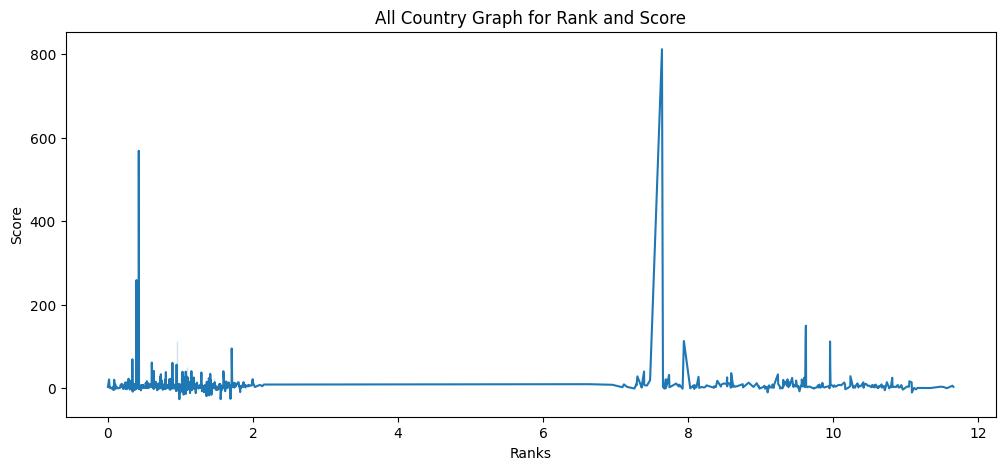

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x=df['GDP per Capita'],y=df['GDP deflator Index growth rate'])
plt.title('All Country Graph for Rank and Score')
plt.xlabel('Ranks')
plt.ylabel('Score')
plt.show()

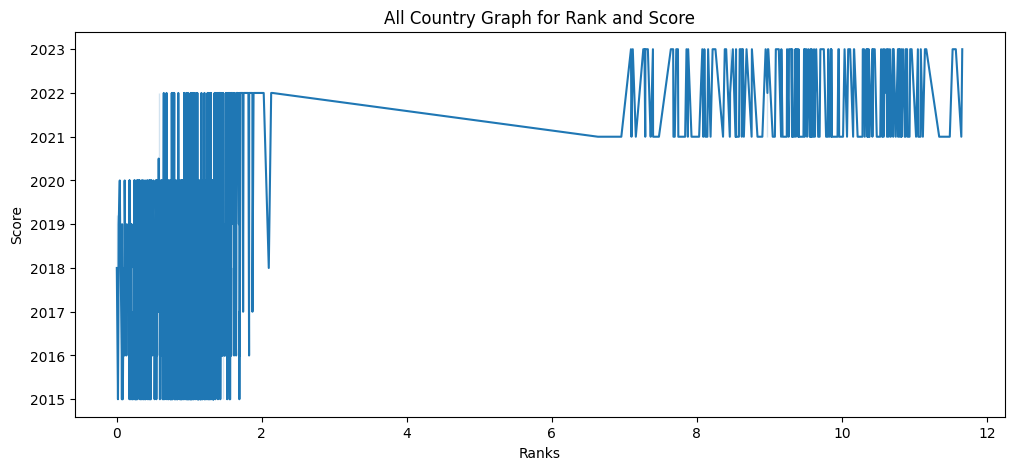

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x=df['GDP per Capita'],y=df['Year'])
plt.title('All Country Graph for Rank and Score')
plt.xlabel('Ranks')
plt.ylabel('Score')
plt.show()

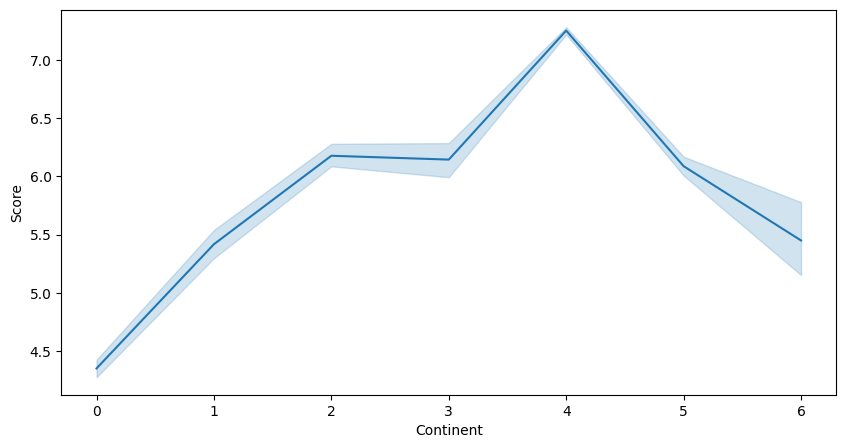

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Continent'],y=df['Score'])
# plt.title('All Country Graph for Rank and Score')
plt.xlabel('Continent')
plt.ylabel('Score')
plt.show()

In [ ]:
df.head()

,Country,Year,Rank,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Energy Consumer Price Inflation,Food Consumer Price Inflation,GDP deflator Index growth rate,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,Continent
0,Afghanistan,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,-4.250000,-0.840000,2.665090,-0.660,0.219999,NaN,1
1,Afghanistan,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,2.070000,5.670000,-2.409509,4.380,5.192760,NaN,1
2,Afghanistan,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,4.440000,6.940000,2.404000,4.976,5.423228,NaN,1
3,Afghanistan,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,1.474185,-1.045952,2.071208,0.630,-0.126033,NaN,1
4,Afghanistan,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,-2.494359,3.794770,6.520928,2.302,NaN,NaN,1


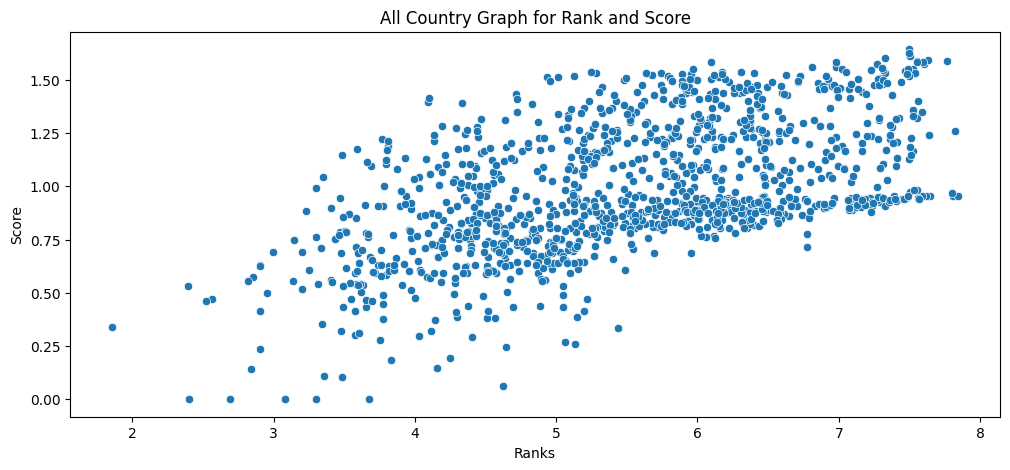

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(y=df['Social support'],x=df['Score'])
plt.title('All Country Graph for Rank and Score')
plt.xlabel('Ranks')
plt.ylabel('Score')
plt.show()

In [ ]:
df.head(5)

,Country,Year,Rank,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Energy Consumer Price Inflation,Food Consumer Price Inflation,GDP deflator Index growth rate,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,Continent
0,Afghanistan,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,-4.250000,-0.840000,2.665090,-0.660,0.219999,NaN,1
1,Afghanistan,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,2.070000,5.670000,-2.409509,4.380,5.192760,NaN,1
2,Afghanistan,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,4.440000,6.940000,2.404000,4.976,5.423228,NaN,1
3,Afghanistan,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,1.474185,-1.045952,2.071208,0.630,-0.126033,NaN,1
4,Afghanistan,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,-2.494359,3.794770,6.520928,2.302,NaN,NaN,1


In [ ]:
df = df.drop(columns =['Country'])

In [ ]:
df.head()

,Year,Rank,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Energy Consumer Price Inflation,Food Consumer Price Inflation,GDP deflator Index growth rate,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,Continent
0,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,-4.250000,-0.840000,2.665090,-0.660,0.219999,NaN,1
1,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,2.070000,5.670000,-2.409509,4.380,5.192760,NaN,1
2,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,4.440000,6.940000,2.404000,4.976,5.423228,NaN,1
3,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,1.474185,-1.045952,2.071208,0.630,-0.126033,NaN,1
4,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,-2.494359,3.794770,6.520928,2.302,NaN,NaN,1


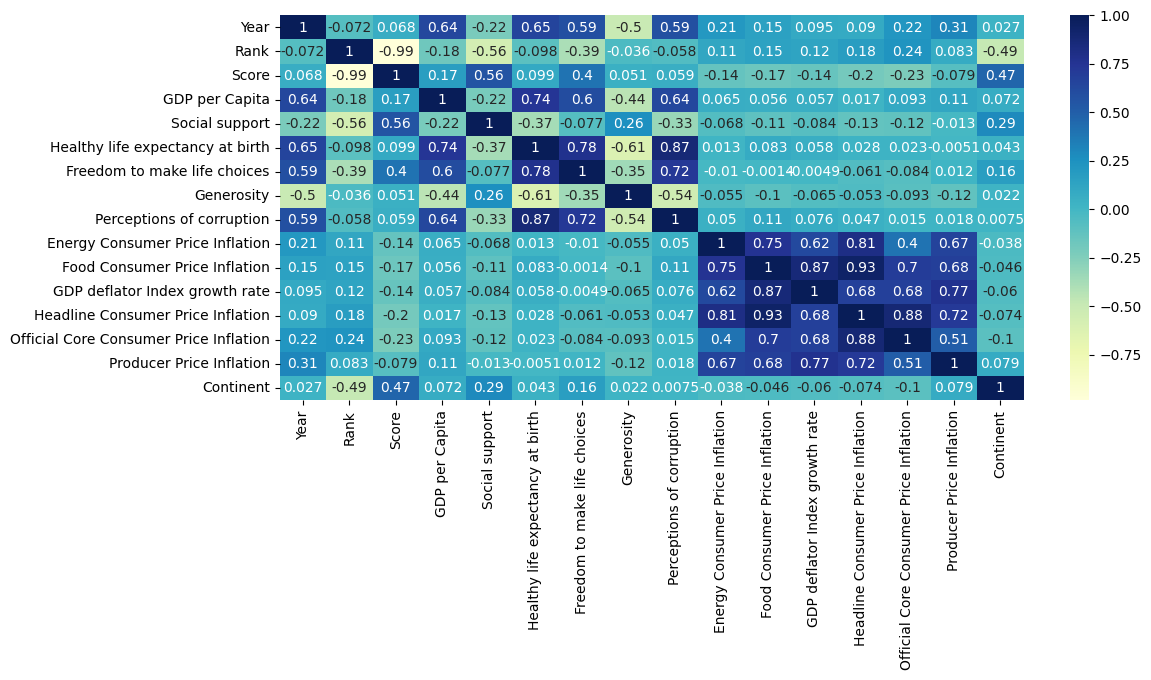

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [ ]:
df.fillna(0,inplace =True)
df.sample(30)

,Year,Rank,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Energy Consumer Price Inflation,Food Consumer Price Inflation,GDP deflator Index growth rate,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,Continent
297,2020,2,7.6456,1.326949,0.955991,72.402504,0.951444,0.066202,0.168489,0.256267,0.638955,2.045052,0.420712,0.933578,-2.736892,2
742,2018,123,4.4170,0.198000,0.902000,0.173000,0.531000,0.206000,0.158000,5.488197,0.005008,3.001299,3.920000,0.000000,5.863803,0
472,2017,81,5.2620,0.995539,1.274445,0.492346,0.443323,0.611705,0.015317,4.991260,2.127687,4.292920,3.809000,3.148834,0.000000,1
1140,2015,21,6.8670,1.266370,1.285480,0.909430,0.596250,0.519120,0.320670,1.249047,-2.581589,0.661286,0.401608,1.300000,-6.643847,2
1167,2015,44,6.0030,0.632440,1.340430,0.597720,0.658210,0.228370,0.308260,0.000000,0.000000,10.420370,8.464000,0.000000,0.000000,1
57,2023,12,7.0950,10.821000,0.934000,71.050000,0.890000,0.198000,0.496000,7.153446,6.581037,3.712317,5.597015,5.309686,0.000000,4
211,2023,13,6.9610,10.773000,0.929000,71.400000,0.874000,0.153000,0.420000,-3.799413,7.842061,1.087442,3.879002,4.125869,0.000000,3
260,2017,12,7.0790,1.109706,1.416404,0.759509,0.580132,0.214613,0.100107,1.231623,1.683956,2.858436,1.626000,1.241769,2.319634,3
1038,2018,5,7.4870,1.420000,1.549000,0.927000,0.660000,0.256000,0.357000,1.346785,1.262028,0.711726,0.940000,0.366216,1.410869,2
615,2015,56,5.8330,1.147230,1.257450,0.731280,0.213420,0.026410,0.010310,-4.758425,-0.861434,0.064041,-0.884097,1.243609,-9.617413,2


In [ ]:
X = df.drop(columns=['Continent'])
y = df['Continent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
bag = BaggingClassifier(max_features=5)

In [ ]:
bag.fit(X_train,y_train)

BaggingClassifier(max_features=5)

In [ ]:
y_pred = bag.predict(X_test)

In [ ]:
acc = accuracy_score(y_pred,y_test)
print('acc:',acc*100)

acc: 65.14522821576763


In [ ]:
from sklearn.tree import plot_tree

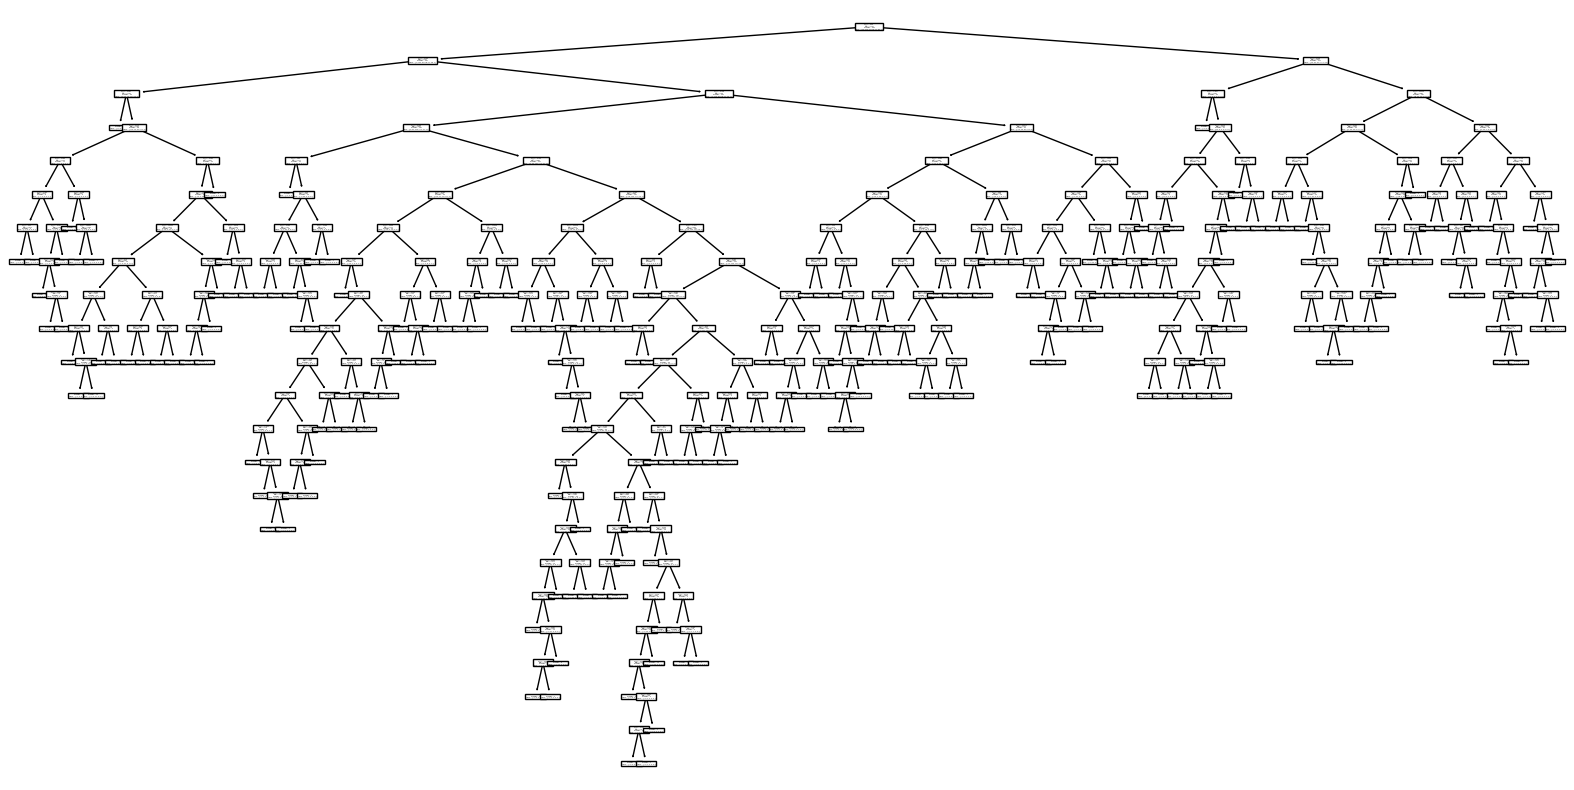

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(bag.estimators_[1],label='all')
plt.show()

#